# In-class assignment L4-1

In [10]:
import pandas as pd

missile_data = pd.read_excel('lect05-factorial.xlsx', 
                             sheet_name='Missile',header=0)
missile_data

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4
8,32.0,S2,P1
9,33.2,S2,P1


## P-value ของ system และ propellant น้อยกว่า alpha=0.05 แสดงว่า Reject H0 จึงสรุปได้ว่าทั้งสองตัวแปรมี interaction กัน และ System กับ Propellant ส่งผลต่อ BurningRate

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'BurningRate ~ System + Propellant + System:Propellant'
mdl = ols(formula, data=missile_data).fit()
aov_table = anova_lm(mdl, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
System,2.0,14.523333,7.261667,5.844400,0.016898
Propellant,3.0,40.081667,13.360556,10.752962,0.001020
System:Propellant,6.0,22.163333,3.693889,2.972949,0.051168
Residual,12.0,14.910000,1.242500,NaN,NaN


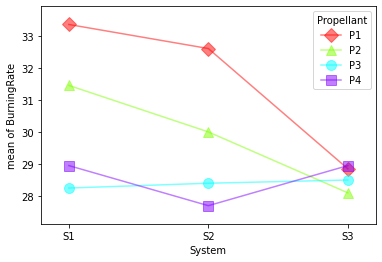

In [17]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(missile_data.System, 
                               missile_data.Propellant, 
                               missile_data.BurningRate, 
                               markers=['D','^','o','s'], ms=10  , alpha=0.5)